# Notes of Dynamic Programming

*Haiyang Yu, 2018-03-25*

## 1. What is DP?

+ Problem analysis: 
    - **Optimal substructure**: the solution to a given optimization problem can be obtained by the combination of optimal solutions to its sub-problems. Such optimal substructures are usually described by means of recursion.
    - **Overlapping sub-problems**: any recursive algorithm solving the problem should solve the same sub-problems over and over, rather than generating new sub-problems.

+ Problem solving: 
    - The key: **Decomposite** and **reuse (memoization)**
    - Approach 1: Top-down (memoized recursion)
    - Approach 2: Bottom-up (loops in size order: solve the smallest problem first, then the bigger ones)

Reference: 
+ https://en.wikipedia.org/wiki/Dynamic_programming
+ Thomas H. Cormen, et al., *Introduction to Algorithms*, Third Edition, 2009.

## 2. Examples
+ Fibonacci sequence
+ Cut rod problem
+ Checkboard
+ Jobs scheduling
+ Dice shrowing
+ 0-1 Knapsack problem


In [1]:
# Fibonacci sequence
import time

# 1. Naive recursion
def fib1(n):
    if n<=1: 
        return 1
    else: 
        return fib1(n-1) + fib1(n-2)

# 2. Recursion + memoization
s = {}
def fib2(n):
    if n<=1:
        s[n] = 1
    else:
        if n-1 in s:
            v1 = s[n-1]
        else:
            v1 = fib3(n-1)
        if n-2 in s:
            v2 = s[n-2]
        else:
            v2 = fib3(n-2)
        s[n] = v1 + v2
    return s[n]

# 3. Use loops instead of recursion (bottom-up)
s0 = [1,1] + [None] * 1000
def fib3(n):
    for i in range(2, n+1):
        s0[i] = s0[i-1] + s0[i-2]
    return s0[n]

n = 32
for k in range(3):
    t0 = time.time()
    if k==0: x = fib1(n);
    if k==1: x = fib2(n);
    if k==2: x = fib3(n);
    t1 = time.time()
    print('method',k+1,': F('+format(n)+') =', x, ', time =', t1-t0)


method 1 : F(32) = 3524578 , time = 0.5018384456634521
method 2 : F(32) = 3524578 , time = 9.775161743164062e-06
method 3 : F(32) = 3524578 , time = 4.5299530029296875e-06


### Cut rod problem

Given a rod of length $n$ inches and a table of prices $p_i$ for $i = 1, 2,..., n$, determine the maximum revenue $r_n$ obtainable by cutting up the rod and selling the pieces.

**Solution**: 

recursive equation: $r_n = max(p_i+r_{n-i}: i=1,2,...,n)$, where $r_0 = 0$.


In [2]:
import pandas as pd

length = list(range(1,11))
price  = [1,5,8,9,10,17,17,20,24,30]
table = dict(zip(length, price))
pd.DataFrame({'length':length, 'price':price}).T

,0,1,2,3,4,5,6,7,8,9
length,1,2,3,4,5,6,7,8,9,10
price,1,5,8,9,10,17,17,20,24,30


In [3]:
import numpy as np

# Top-down with memoization
def cutrod_topdown(p, n):
    r = [-1]*(n+1)
    return cutrod_topdown_r(p, n, r)

def cutrod_topdown_r(p, n, r):
    if r[n] >= 0: 
        return r[n]
    if n==0:
        return 0
    else:
        q = -1
        for i in p.keys():
            if i<=n:  q = max(q, p[i]+cutrod_topdown_r(p, n-i, r))
        r[n] = q
        return q

# Bottom-up approach
def cutrod_bottomup(p, n):
    r = [0] * (n+1)
    length = np.array(list(p.keys())).astype(int)
    for i in length[length<=n]:
        q = p[i]
        for j in length[length<i]:
            q = max(q, p[j]+r[i-j])
        r[i] = q
    return r[n]

n = 4
print( 'Top-down:  r['+format(n)+'] =', cutrod_topdown( table, n) )
print( 'Bottom-up: r['+format(n)+'] =', cutrod_bottomup( table, n) )


Top-down:  r[4] = 10
Bottom-up: r[4] = 10


**Recursion diagram (subproblem graph)**
<img src='./fig1.png'>

In [4]:
# Return the full solution
def cutrod_bottomup_full(p, n):
    r = [0] * (n+1)
    s = {i:[]  for i in p.keys()}
    length = np.array(list(p.keys())).astype(int)
    for i in length[length<=n]:
        q = p[i]
        x = i
        for j in length[length<i]:
            if (p[j] + r[i-j] > q):
                q = p[j]+r[i-j]
                x = j            
        r[i] = q
        if x==i: s[i] = [i]
        else:
            s[i] = s[i-x] + [x]
    return r, s

print(cutrod_bottomup_full(table, 10))

([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30], {1: [1], 2: [2], 3: [3], 4: [2, 2], 5: [3, 2], 6: [6], 7: [6, 1], 8: [6, 2], 9: [6, 3], 10: [10]})


In [5]:
# Return the full solution (less time cost)
def cutrod_bottomup_full(p, n):
    r = [0] * (n+1)
    s = {i:[]  for i in p.keys()}
    length = np.array(list(p.keys())).astype(int)
    for i in length[length<=n]:
        q = p[i]
        x = i
        for j in length[((i/2)<=length) & (length<i)]:
            if (p[j] + r[i-j] > q):
                q = r[j]+r[i-j]
                x = j            
        r[i] = q
        if x==i: s[i] = [i]
        else:
            s[i] = s[i-x] + [x]
    return r, s

print(cutrod_bottomup_full(table, 10))

([0, 1, 5, 8, 10, 13, 17, 18, 22, 25, 30], {1: [1], 2: [2], 3: [3], 4: [2, 2], 5: [2, 3], 6: [6], 7: [1, 6], 8: [2, 6], 9: [3, 6], 10: [10]})


### Checkerboard problem

Given the following triangle, find the path with the largest sum from the top to bottom.

$$2$$
$$5\ \ 4$$
$$3\ \ 4\ \ 7$$
$$1\ \ 6\ \ 9\ \ 6$$


In [6]:
class BTree:
    def __init__(self, tri):
        self.num = tri[0][0]
        if len(tri) == 1:
            self.left  = 0
            self.right = 0
            self.node = 'leaf'
        else:
            ltri = [t[0:-1] for t in tri[1:]]
            rtri = [t[1:]   for t in tri[1:]]
            self.node = 'root'
            self.left  = BTree(ltri)
            self.right = BTree(rtri)
        return    

# Naive recursion
def largestsum(bt):
    if bt.node == 'leaf':
        return bt.num
    else:
        return bt.num + max(largestsum(bt.left), largestsum(bt.right))
    
largestsum(BTree([ [2], [5,4], [3,4,7], [1,6,9,6] ]))

22

In [7]:
# Bottom-up approach with the path
def largestsum_bottomup(tri):
    opt  = [t for t in tri ]
    turn = [['']*len(t) for t in tri]
    for i in range(len(tri)-2, -1, -1):
        for j in range(i+1):
            if opt[i+1][j] > opt[i+1][j+1]:
                turn[i][j] = 'L'
                opt[i][j] += opt[i+1][j]
            else:
                turn[i][j] = 'R'
                opt[i][j] += opt[i+1][j+1]
    return opt, turn

largestsum_bottomup( [[2], [5,4], [3,4,7], [1,6,9,6]] )

([[22], [18, 20], [9, 13, 16], [1, 6, 9, 6]],
 [['R'], ['R', 'R'], ['R', 'R', 'L'], ['', '', '', '']])

### Jobs scheduling problem

Given a list of jobs $(S_i, E_i, V_i), i=1,2,...,n$ with the starting times $S_i$, ending times $E_i$, and values $V_i$, how to schedule them (without overlap) to get the largest total value?


In [8]:
import numpy as np

def jobs_random(n=10):
    jobs = {'S':[], 'E':[], 'V':[]}
    for i in range(n):
        jobs['S'].append( np.random.uniform(low=0, high=1) )
        jobs['E'].append( np.random.uniform(low=jobs['S'][-1], high=1) )
        jobs['V'].append( int(np.random.uniform(low=1, high=100)) )
    return jobs

jobs = pd.DataFrame( jobs_random(n=10), columns=['S', 'E', 'V'] )
jobs

,S,E,V
0,0.314218,0.793067,84
1,0.091415,0.463067,62
2,0.740251,0.868208,94
3,0.517169,0.647762,25
4,0.637331,0.738314,7
5,0.018968,0.983986,5
6,0.420860,0.953489,30
7,0.949254,0.980075,22
8,0.247349,0.601177,98
9,0.647384,0.915254,25


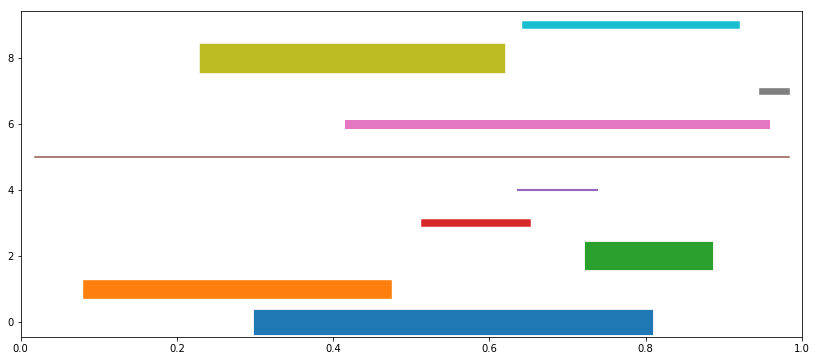

In [9]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
for i in range(10):
    plt.plot([jobs['S'][i], jobs['E'][i]], [i, i], lw=30.0*jobs['V'][i]/100)
plt.xlim([0,1])
plt.show()

In [10]:
# bottom-up approach
def jobschedule_bottomup(jobs):
    n = len(jobs)

    # 1. Decomposite: establish the recursive table
    sid = list(jobs.sort_values(['S']).index)
    rt  = {i:[]  for i in range(n)}
    opt = np.zeros([n])
    chain = {i:[]  for i in range(n)}
    for i in range(n-1,-1,-1):
        for j in range(i):
            if jobs['S'][sid[i]] >= jobs['E'][sid[j]]:
                rt[sid[i]].append(sid[j])
        print(sid[i], rt[sid[i]])
    
    # 2. Bottom-up loop
    for i in range(n):
        if len(rt[sid[i]]) == 0:
            opt[sid[i]] = jobs['V'][sid[i]]
        else:
            k = np.argmax(opt[rt[sid[i]]])
            opt[sid[i]] = jobs['V'][sid[i]] + opt[rt[sid[i]]][k]
            chain[sid[i]].append(rt[sid[i]][k])
    bs = [np.argmax(opt)]
    while(len(chain[bs[-1]]) > 0):
        bs.append(chain[bs[-1]][0])
    print('optimization: ', opt)
    print('opt. chain: ', chain )
    return bs[::-1], sum(jobs['V'][bs])

bs, bv = jobschedule_bottomup(jobs)
print(bs, bv)

7 [1, 8, 0, 3, 4, 9, 2]
2 [1, 8, 3, 4]
9 [1, 8]
4 [1, 8]
3 [1]
6 []
0 []
8 []
1 []
5 []
optimization:  [ 84.  62. 199.  87. 105.   5.  30. 221.  98. 123.]
opt. chain:  {0: [], 1: [], 2: [4], 3: [1], 4: [8], 5: [], 6: [], 7: [2], 8: [], 9: [8]}
[8, 4, 2, 7] 221


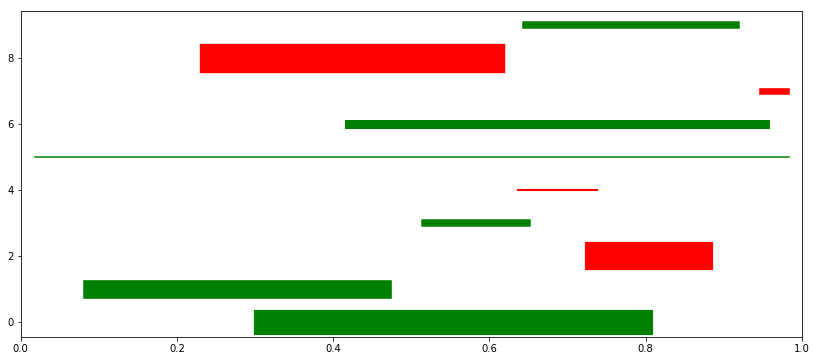

In [11]:
plt.figure(figsize=(14,6))
for i in range(10):
    if i in bs: c='r'
    else: c = 'g'
    plt.plot([jobs['S'][i], jobs['E'][i]], [i, i], lw=30.0*jobs['V'][i]/100, c=c)
plt.xlim([0,1])
plt.show()

### Shrowing dice

There are different versions for this question: Given a dice with m surfaces (values are $V_i, i=1,2,...,m$),

**Version 1: Toss it n times, get the number of ways that makes the total value being X.**

Solution: 

Let the solution is $S(m,n,X)$, then we can establish the recursive equation: 

$$ S(m,n,X) = \sum{S(m,n-1,X-V_i)} = S(m,n-1,X-V_1) + S(m,n-1,X-V_2) + ... + S(m,n-1,X-V_m) $$

The above resursion exhibits overlapped subproblems, as shown by the following figure:

<img src='fig2.png'>


In [12]:
# Top-down approach: recursion with memoization

def ways(v, n, x):
    m = len(v)
    s = np.zeros([n, x]).astype(int) - 99
    return s, ways_r(v, m, n, x, s)

def ways_r(v, m, n, x, s):
    if x > 0:
        if (x > max(v)*n) or (x < min(v)*n): 
            s[n-1, x-1] = 0
            return 0
        if n == 1:
            s[n-1, x-1] = 1
            return 1
        else:
            if s[n-1, x-1] < 0:
                s[n-1, x-1] = 0
                for i in v:
                    s[n-1, x-1] += ways_r(v, m, n-1, x-i, s)
            return s[n-1, x-1]
    else:
        return 0
    
ways([1,2,3,4,5,6], 5, 10)

(array([[  1,   1,   1,   1,   1,   1, -99, -99, -99, -99],
        [  0,   1,   2,   3,   4,   5,   6, -99, -99, -99],
        [  0,   0,   1,   3,   6,  10,  15,  21, -99, -99],
        [-99, -99, -99,   1,   4,  10,  20,  35,  56, -99],
        [-99, -99, -99, -99, -99, -99, -99, -99, -99, 126]]), 126)

In [13]:
# Bottom-up approach: ordinary loops

def ways_bottomup(v, n, x):
    m = len(v)
    s = np.zeros([n, x]).astype(int) - 99
    for i in v:   s[0, i-1] = 1
    jmin = min(v)-1; jmax = max(v)-1
    for i in range(1,n):
        jmin = min( jmin + min(v), x-1)
        jmax = min( max(min( jmax + max(v), x-1-min(v)*(n-i-1) ), jmin+1), x-1)
        for j in range(jmin, jmax+1):
            s[i,j] = 0
            for k in v:
                if (j-k >= 0) and (s[i-1,j-k]>0): s[i,j] += s[i-1, j-k]
    return s, s[n-1, x-1]

ways_bottomup([1,2,3,4,5,6], 5, 10)

(array([[  1,   1,   1,   1,   1,   1, -99, -99, -99, -99],
        [-99,   1,   2,   3,   4,   5,   6, -99, -99, -99],
        [-99, -99,   1,   3,   6,  10,  15,  21, -99, -99],
        [-99, -99, -99,   1,   4,  10,  20,  35,  56, -99],
        [-99, -99, -99, -99,   1,   5,  15,  35,  70, 126]]), 126)

**Version 2: Toss it N times, get the pdf of the total (or averaged) value X. (Multinomial distribution)**

1 0.9999999999999999
2 1.0000000000000002
3 0.9999999999999999
10 0.9999999999999997
30 0.9999999999999988


/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


100 0.9999999999999942
300 0.9999999999999816


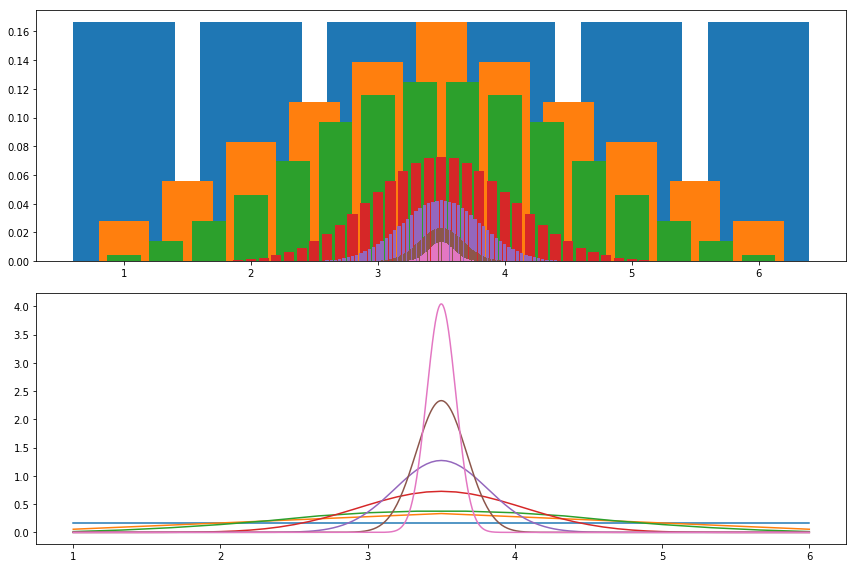

In [14]:
# Bottom-up approach: ordinary loops
def pdfx(v, p, n):
    pdict = dict(zip(v, p))
    m = len(v)
    xmin = min(v) * n
    xmax = max(v) * n
    s = np.zeros([n, xmax])
    for i in v:   s[0, i-1] = pdict[i]
    jmin = min(v)-1; jmax = max(v)-1
    for i in range(1,n):
        jmin = min( jmin + min(v), xmax-1)
        jmax = max( min(jmax + max(v), xmax-1), jmin+1)
        for j in range(jmin, jmax+1):
            s[i,j] = 0
            for k in v:
                if (j-k >= 0) and (s[i-1,j-k]>0): s[i,j] += s[i-1, j-k]*pdict[k]
    return np.arange(xmin, xmax+1), s[n-1, (xmin-1):]

plt.figure(figsize=(12,8))
for n in [1,2,3,10,30,100,300]:
    x, p = pdfx([1,2,3,4,5,6], [1.0/6]*6, n)
    print(n, sum(p))
    plt.subplot(2,1,1)
    plt.bar(x/n, p, width=0.8/n)

    plt.subplot(2,1,2)
    plt.plot(x/n, p*n)
    
plt.tight_layout()


1 1.0
2 1.0
3 1.0
10 1.0
30 0.9999999999999994


/home/oscar/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


100 0.9999999999999998
300 0.999999999999998


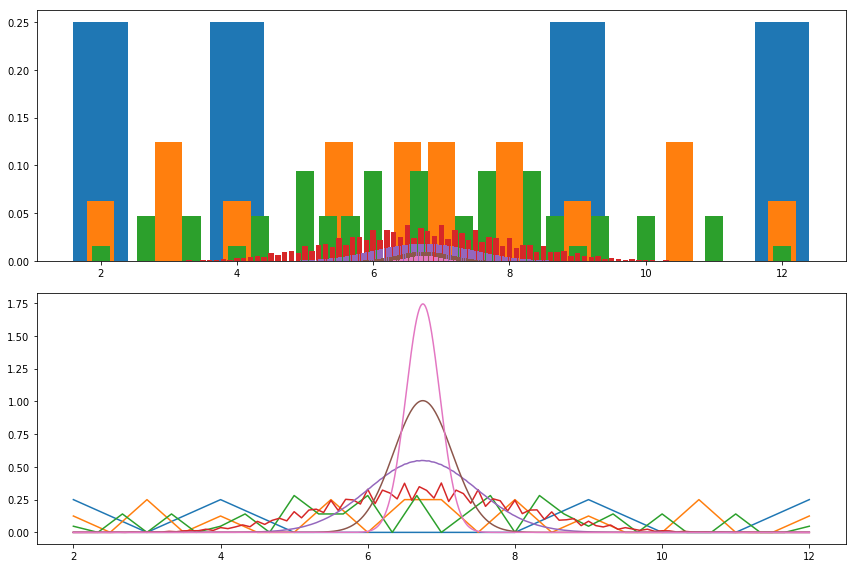

In [15]:
plt.figure(figsize=(12,8))
for n in [1,2,3,10,30,100,300]:
    x, p = pdfx([2,4,9,12], [1.0/4]*4, n)
    print(n, sum(p))
    plt.subplot(2,1,1)
    plt.bar(x/n, p, width=0.8/n)

    plt.subplot(2,1,2)
    plt.plot(x/n, p*n)
    
plt.tight_layout()


**Version 3: Toss it until the total value reach (larger than or equal to) X, get the PDF of the toss times N and result total value Y**

0.9999999999999997 0.9999999999999999


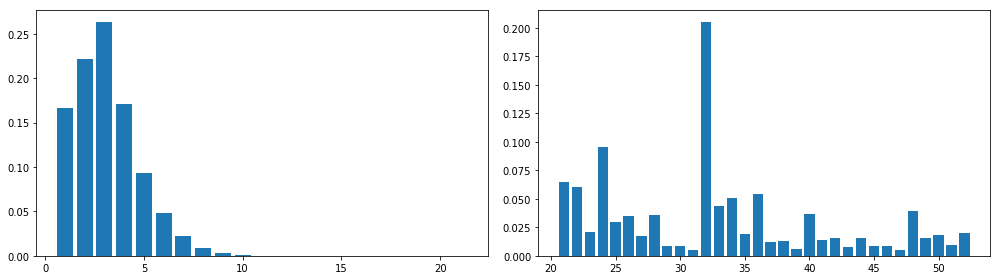

In [16]:
# Bottom-up approach: ordinary loops
import math

def pdfny(v, p, x):
    pdict = dict(zip(v, p))
    m = len(v)
    n = math.ceil( x/min(v) )
    s = pdfxmax(v, p, n, x+max(v))
    py = {x+i:0 for i in range(max(v))}
    pn  = {i+1:0 for i in range(n)}
    for y in py.keys():
        for i in range(n):
            if i==0:
                pn[i+1] += s[i,y-1]
                py[y] += s[i,y-1]
            else:
                tmp = 0
                for k in v:
                    if ((y-1-k) >= 0) and (y-k<x):
                        tmp += s[i-1, y-1-k ] * pdict[k]
                pn[i+1] += tmp
                py[y] += tmp
    return pn, py

def pdfxmax(v, p, n, x):
    pdict = dict(zip(v, p))
    m = len(v)
    xmax = min(x, max(v)*n)
    s = np.zeros([n, xmax])
    for i in v:   s[0, i-1] = pdict[i]
    jmin = min(v)-1; jmax = max(v)-1
    for i in range(1,n):
        jmin = min( jmin + min(v), xmax-1)
        jmax = max( min(jmax + max(v), xmax-1), jmin+1)
        for j in range(jmin, jmax+1):
            s[i,j] = 0
            for k in v:
                if (j-k >= 0) and (s[i-1,j-k]>0): s[i,j] += s[i-1, j-k]*pdict[k]
    return s

#pn, py = pdfny([1,2,3,4,5,6], [1.0/6]*6, 21)
pn, py = pdfny([1,2,4,8,16,32], [1.0/6]*6, 21)
print(sum(pn.values()),  sum(py.values()))

plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.bar(pn.keys(), pn.values())
plt.subplot(1,2,2)
plt.bar(py.keys(), py.values())
plt.tight_layout()

### 0-1 Knapsack problem

Given n items with weights and values, put them into a knapsack with weight capacity W, find the combination of these items to get the maximum total value in the knapsack. Mathematically, it is described as:

$$ Maximize \sum{ v_i x_i } $$

$$ Subject \ to \sum{w_i x_i} \leq W, \ where \ x_i \in \{0,1\} $$



In [83]:
# Bottom-up approach

def knapsack_bottomup(w, v, cap):
    cap = int(cap)
    n = len(w)
    opt = np.zeros([n, cap+1])
    cid = np.zeros([n, cap+1, n]).astype(int)
    opt[0, w[0]:] = v[0]
    cid[0, w[0]:, 0] = 1
    for i in range(1,n):
        for j in range(1, cap+1):
            if j < w[i]:
                opt[i, j] = opt[i-1, j]
                cid[i, j, :] = cid[i-1, j, :]
            else:
                if opt[i-1, j] >= v[i]+opt[i-1, j-w[i]]:
                    opt[i, j] = opt[i-1, j]
                    cid[i, j, :] = cid[i-1, j, :]
                else:
                    opt[i, j] = v[i]+opt[i-1, j-w[i]]
                    cid[i, j, :] = cid[i-1, j-w[i]] + 0
                    cid[i, j, i] = 1
    return opt, cid

w = np.random.uniform(low=1, high=10, size=4).astype(int)
v = np.random.uniform(low=0, high=100, size=4)
print(w, v)
opt, cid = knapsack_bottomup(w, v, 15)
print(opt.T)
print(cid[-1,:,:])

[9 3 8 9] [62.99338602 35.889933    2.66487626 74.32279995]
[[  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]
 [  0.          35.889933    35.889933    35.889933  ]
 [  0.          35.889933    35.889933    35.889933  ]
 [  0.          35.889933    35.889933    35.889933  ]
 [  0.          35.889933    35.889933    35.889933  ]
 [  0.          35.889933    35.889933    35.889933  ]
 [  0.          35.889933    35.889933    35.889933  ]
 [ 62.99338602  62.99338602  62.99338602  74.32279995]
 [ 62.99338602  62.99338602  62.99338602  74.32279995]
 [ 62.99338602  62.99338602  62.99338602  74.32279995]
 [ 62.99338602  98.88331902  98.88331902 110.21273294]
 [ 62.99338602  98.88331902  98.88331902 110.21273294]
 [ 62.99338602  98.88331902  98.88331902 110.21273294]
 [ 62.99338602  98.88331902  98.88331902 110.21273294]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 

In [84]:
# Top-down approach

def knapsack_topdown(w, v, cap):
    cap = int(cap)
    n = len(w)
    opt = np.zeros([n, cap+1]) - 99
    cid = np.zeros([n, cap+1, n]).astype(int)
    totalvalue = knapsack_topdown_r(w, v, cap, opt, cid)
    return opt, cid

def knapsack_topdown_r(w, v, cap, opt, cid):
    print(w, cap)
    if len(w) == 1:
        if cap < w[0]:
            opt[0, cap] = 0
            cid[0, cap, 0] = 0
            return 0
        else:
            opt[0, cap] = v[0]
            cid[0, cap, 0] = 1
            return v[0]
    else:
        if opt[len(w)-2, cap] < 0:
            s0 = knapsack_topdown_r(w[0:-1], v[0:-1], cap, opt, cid)
        else:
            s0 = opt[len(w)-2, cap]
        
        if cap < w[-1]:
            opt[len(w)-1, cap] = s0
            cid[len(w)-1, cap, :] = cid[len(w)-2, cap, :] 
        else:
            if opt[len(w)-2, cap-w[-1]] < 0:
                s1 = knapsack_topdown_r(w[0:-1], v[0:-1], cap-w[-1], opt, cid) + v[-1]
            else:
                s1 = opt[len(w)-2, cap-w[-1]] + v[-1]

            if s0 >= s1:
                opt[len(w)-1, cap] = s0
                cid[len(w)-1, cap, :] = cid[len(w)-2, cap, :]
            else:
                opt[len(w)-1, cap] = s1
                cid[len(w)-1, cap, :] = cid[len(w)-2, cap-w[-1], :] + 0
                cid[len(w)-1, cap, len(w)-1] = 1
        return opt[len(w)-1, cap]

opt, cid = knapsack_topdown(w, v, 15)
print(opt.T)
print(cid[-1,:,:])

[9 3 8 9] 15
[9 3 8] 15
[9 3] 15
[9] 15
[9] 12
[9 3] 7
[9] 7
[9] 4
[9 3 8] 6
[9 3] 6
[9] 6
[9] 3
[[-99.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [  0.         -99.         -99.         -99.        ]
 [  0.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [  0.          35.889933    35.889933   -99.        ]
 [  0.          35.889933   -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [ 62.99338602 -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [-99.         -99.         -99.         -99.        ]
 [ 62.99338602  98.88331902  98.88331902 110.21273294]]
[[0 0 0 0]
 [0 0 0 0]
